Delhi Climate Analysis Tool

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load data

In [2]:
data_train = pd.read_csv("./DailyDelhiClimateTrain.csv")
data_test = pd.read_csv("./DailyDelhiClimateTest.csv")

In [6]:
print(data_train)

            date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]


In [7]:
data_train["date"] = pd.to_datetime(data_train["date"])
data_train.set_index("date",inplace=True)
data_train = data_train.asfreq(pd.infer_freq(data_train.index))

In [8]:
meanTempTrain = data_train.iloc[:,:1]
meanHumidityTrain = data_train.iloc[:,1:2]
windSpeedTrain = data_train.iloc[:,2:3]
meanPressureTrain = data_train.iloc[:,3:4]


Text(0.5, 1.0, 'pressure')

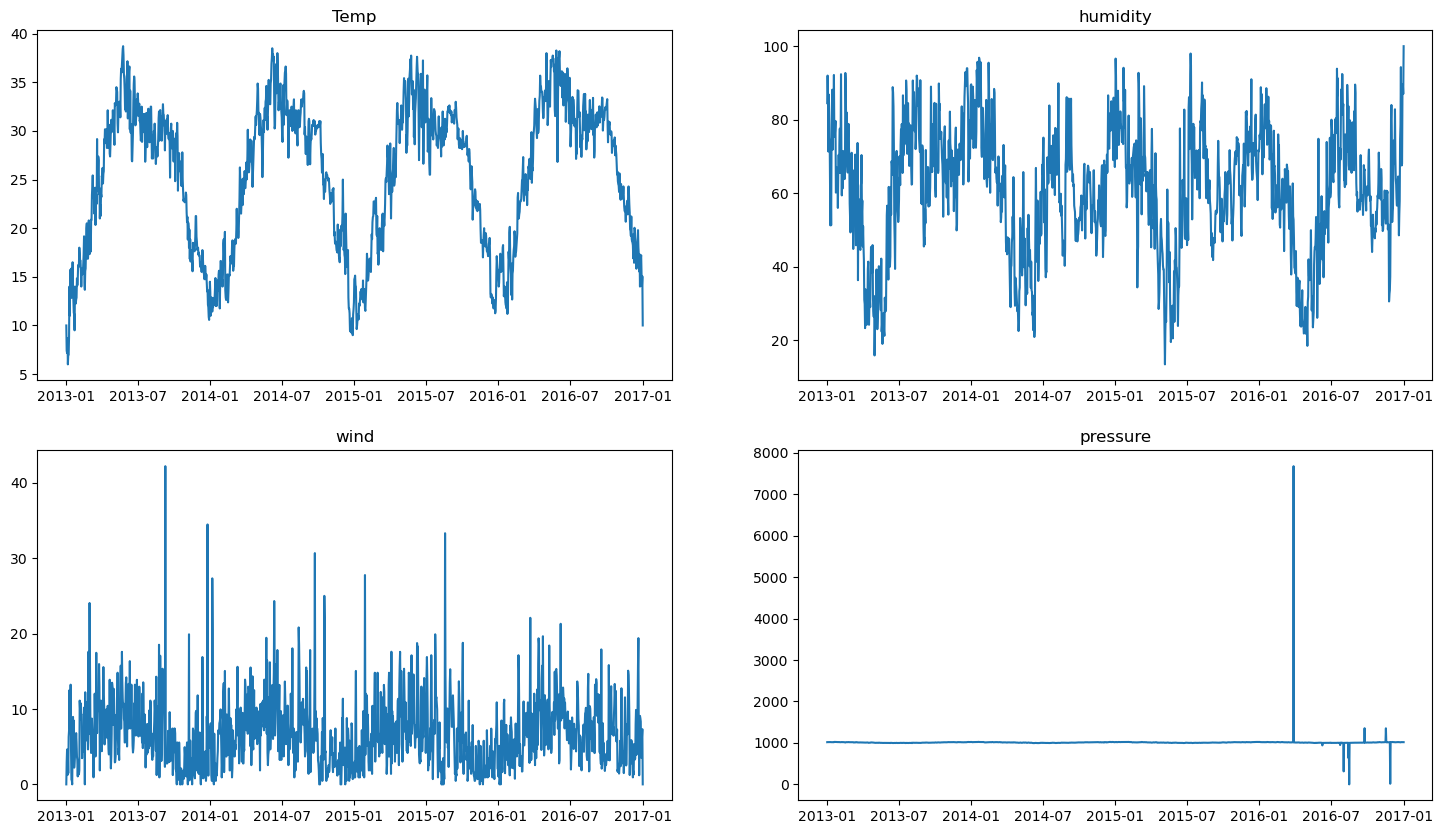

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize =(18,10))

ax1.plot(meanTempTrain)
ax1.set_title("Temp")
ax2.plot(meanHumidityTrain)
ax2.set_title("humidity")
ax3.plot(windSpeedTrain)
ax3.set_title("wind")
ax4.plot(meanPressureTrain)
ax4.set_title("pressure")

Temperature Analysis

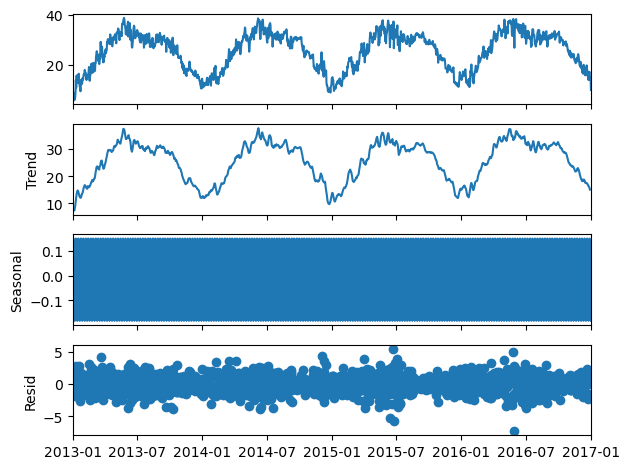

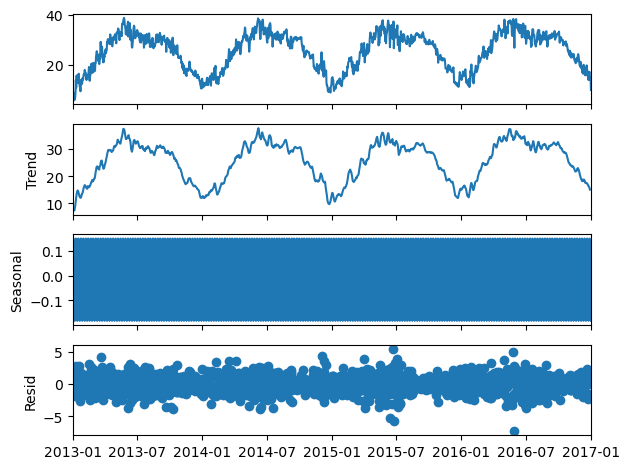

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(meanTempTrain)
decompose.plot()

Axes(0.125,0.11;0.775x0.77)


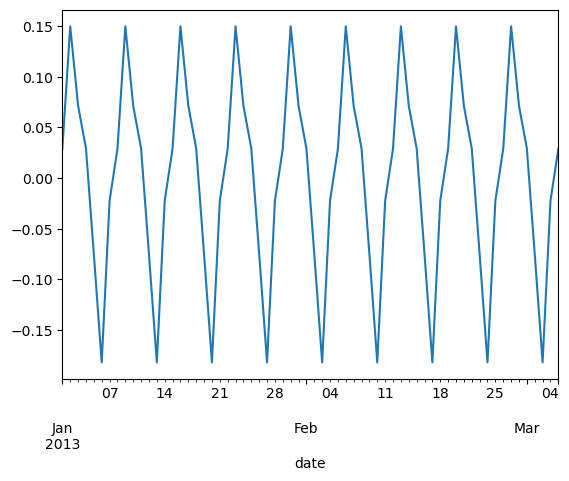

In [12]:
print(decompose.seasonal.iloc[:64].plot())

Prophet aplication

In [13]:
data_train= data_train.reset_index()
data_train = data_train[['date','meantemp']]
data_train = data_train.rename(columns={'date':'ds' , 'meantemp':'y'})
data_train=data_train[:-1]


In [14]:
data_train.head()

,ds,y
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


Prophet Baseline Model No Parameter Tuning

In [15]:
from prophet import Prophet

In [17]:
m = Prophet()
m.fit(data_train)

12:33:58 - cmdstanpy - INFO - Chain [1] start processing
12:33:59 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future=m.make_future_dataframe(periods=114)
future.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [22]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.615937,9.229953,14.167613,24.615937,24.615937,-12.878939,-12.878939,-12.878939,0.031215,0.031215,0.031215,-12.910153,-12.910153,-12.910153,0.0,0.0,0.0,11.736998
1,2013-01-02,24.616596,9.258831,14.564470,24.616596,24.616596,-12.741330,-12.741330,-12.741330,0.143298,0.143298,0.143298,-12.884628,-12.884628,-12.884628,0.0,0.0,0.0,11.875267
2,2013-01-03,24.617256,9.201008,14.334744,24.617256,24.617256,-12.780523,-12.780523,-12.780523,0.064055,0.064055,0.064055,-12.844577,-12.844577,-12.844577,0.0,0.0,0.0,11.836733
3,2013-01-04,24.617916,9.218081,14.525893,24.617916,24.617916,-12.767657,-12.767657,-12.767657,0.024297,0.024297,0.024297,-12.791954,-12.791954,-12.791954,0.0,0.0,0.0,11.850259
4,2013-01-05,24.618575,9.161880,14.388743,24.618575,24.618575,-12.801232,-12.801232,-12.801232,-0.072492,-0.072492,-0.072492,-12.728741,-12.728741,-12.728741,0.0,0.0,0.0,11.817343


c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


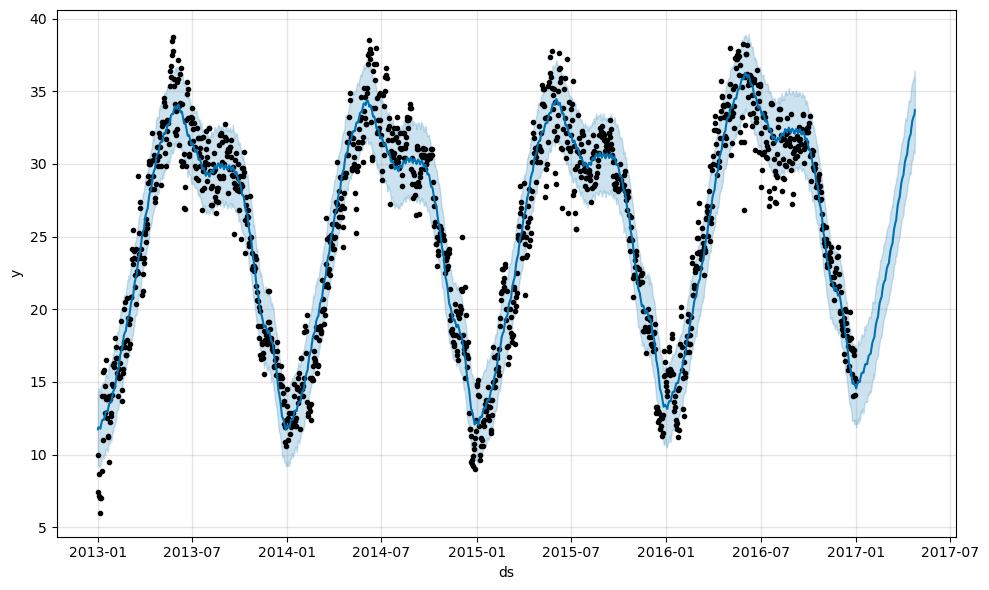

In [37]:
m.plot(forecast);

c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To 

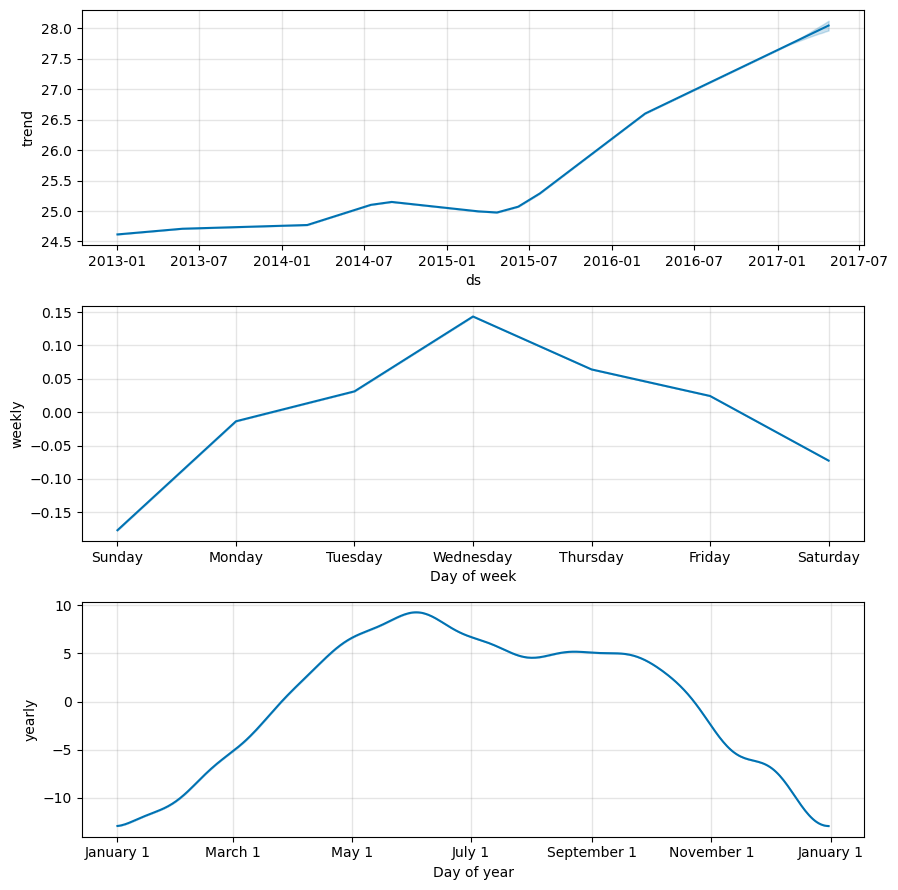

In [31]:
m.plot_components(forecast);

In [40]:
from sklearn.metrics import r2_score , mean_squared_error  ,  mean_absolute_error
from statsmodels.tools.eval_measures import rmse

y_true = data_test.meantemp
y_pred = forecast.yhat.tail(114)

print("R2 SCORE :",r2_score(y_true ,  y_pred))
print("MSE :" , mean_squared_error(y_true ,  y_pred))
print("MAE :" , mean_absolute_error(y_true ,  y_pred))
print("RMSE :" , rmse(y_true ,  y_pred))

R2 SCORE : 0.8132666399279379
MSE : 7.487201956802998
MAE : 2.235959430064553
RMSE : 2.7362751975638337


Prophet With Tuning

In [46]:
m2 = Prophet(interval_width=0.95 , weekly_seasonality= True , yearly_seasonality=True , daily_seasonality=True)
m2.add_seasonality("Monthly" , period=30.5 , fourier_order=5 , prior_scale=0.05)
m2.fit(data_train)
future2=m2.make_future_dataframe(periods=114)
future2.head()
forecast2 = m2.predict(future2)
forecast2.head()

16:57:20 - cmdstanpy - INFO - Chain [1] start processing
16:57:21 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Monthly,Monthly_lower,Monthly_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,12.913537,8.024903,15.918879,12.913537,12.913537,0.174707,0.174707,0.174707,-1.016702,...,0.031115,0.031115,0.031115,-12.903073,-12.903073,-12.903073,0.0,0.0,0.0,11.896835
1,2013-01-02,12.914349,7.812407,15.917204,12.914349,12.914349,0.092027,0.092027,0.092027,-0.961092,...,0.143411,0.143411,0.143411,-12.877079,-12.877079,-12.877079,0.0,0.0,0.0,11.953257
2,2013-01-03,12.915161,7.987323,15.597990,12.915161,12.915161,0.067288,0.067288,0.067288,-1.024716,...,0.064123,0.064123,0.064123,-12.836676,-12.836676,-12.836676,0.0,0.0,0.0,11.890445
3,2013-01-04,12.915973,7.979889,15.986440,12.915973,12.915973,0.151474,0.151474,0.151474,-0.927564,...,0.024230,0.024230,0.024230,-12.783817,-12.783817,-12.783817,0.0,0.0,0.0,11.988409
4,2013-01-05,12.916785,8.157077,15.849749,12.916785,12.916785,0.280532,0.280532,0.280532,-0.832034,...,-0.072632,-0.072632,-0.072632,-12.720483,-12.720483,-12.720483,0.0,0.0,0.0,12.084751


c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


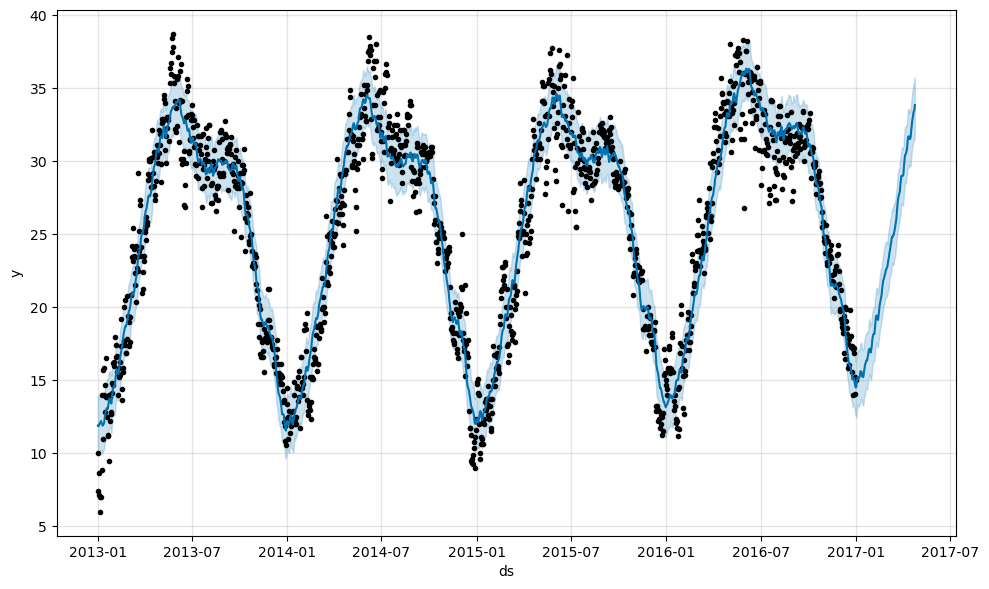

In [45]:
m2.plot(forecast2);

c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To 

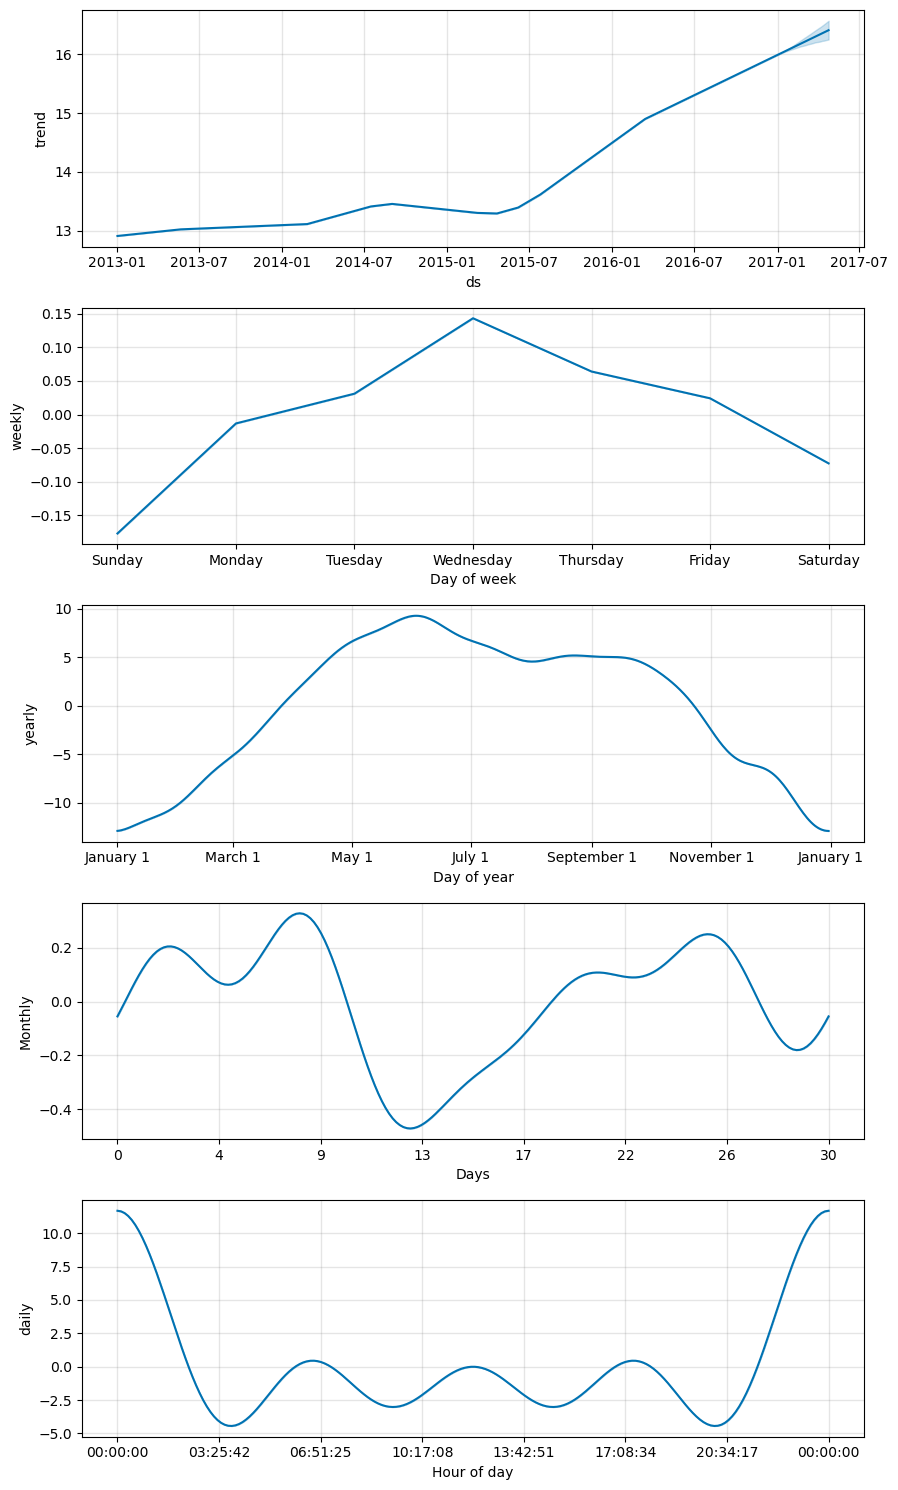

In [48]:
m2.plot_components(forecast2);

In [49]:
y_true = data_test.meantemp
y_pred = forecast2.yhat.tail(114)

print("R2 SCORE :",r2_score(y_true ,  y_pred))
print("MSE :" , mean_squared_error(y_true ,  y_pred))
print("MAE :" , mean_absolute_error(y_true ,  y_pred))
print("RMSE :" , rmse(y_true ,  y_pred))

R2 SCORE : 0.81275612592521
MSE : 7.507671365368908
MAE : 2.22781181117682
RMSE : 2.74001302284659
